In [2]:
# load libraries
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# function to create the standard errors for the subset model estimates
confidence_interval <- function(vector, interval) {
  # Standard deviation of sample
  vec_sd <- sd(vector)
  # Sample size
  n <- length(vector)
  # Mean of sample
  vec_mean <- mean(vector)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- c("lower" = vec_mean - error, "upper" = vec_mean + error)
  return(result)
}

In [4]:
# get RDS fils containing a list for the each ME model output. Reactions: outputs for the estimators
list_of_reactions <- readRDS("./upvote_novote_all/list_of_reactions.RDS")

In [5]:
# aggregate data
df_of_reactions <- as.data.frame(do.call(rbind, list_of_reactions))
head(df_of_reactions)

,x,predicted,std.error,conf.low,conf.high,group,group_col
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,deliberation,0.097867900,0.08876836,-0.07611489,0.2718507,upvote_only,upvote_only
2,deliberation,-0.016935107,0.08919261,-0.19174941,0.1578792,no_votes,no_votes
3,demagoguery,-0.065829122,0.08876836,-0.23981191,0.1081537,upvote_only,upvote_only
4,demagoguery,0.002897548,0.08919261,-0.17191675,0.1777118,no_votes,no_votes
5,civic,0.020113859,0.08876836,-0.15386893,0.1940966,upvote_only,upvote_only
6,civic,-0.058850178,0.08919261,-0.23366448,0.1159641,no_votes,no_votes


In [6]:
# calculate confidence intervals and mean estimators
df_reactions <- cbind.data.frame(aggregate(.~x+group, df_of_reactions,mean),aggregate(.~x+group, df_of_reactions,function(x) confidence_interval(x, 0.95))$predicted)

In [7]:
# format and rename data
df_reactions$group <- as.character(df_reactions$group)
df_reactions$group[df_reactions$group=='upvote_only'] <- 'only upvotes'
df_reactions$group[df_reactions$group=='no_votes'] <- 'no votes'

In [8]:
df_reactions

x,group,predicted,std.error,conf.low,conf.high,group_col,lower,upper
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
civic,only upvotes,0.093073694,0.08559006,-0.07467975,0.26082713,1,0.082078882,0.10406851
deliberation,only upvotes,0.194260594,0.08559006,0.02650715,0.36201403,1,0.173642820,0.21487837
demagoguery,only upvotes,-0.101130460,0.08559006,-0.26888390,0.06662298,1,-0.111930748,-0.09033017
civic,no votes,0.004711309,0.08604448,-0.16393277,0.17335539,2,-0.006468274,0.01589089
deliberation,no votes,0.068021922,0.08604448,-0.10062216,0.23666600,2,0.047177333,0.08886651
demagoguery,no votes,-0.047339984,0.08604448,-0.21598406,0.12130410,2,-0.058611236,-0.03606873


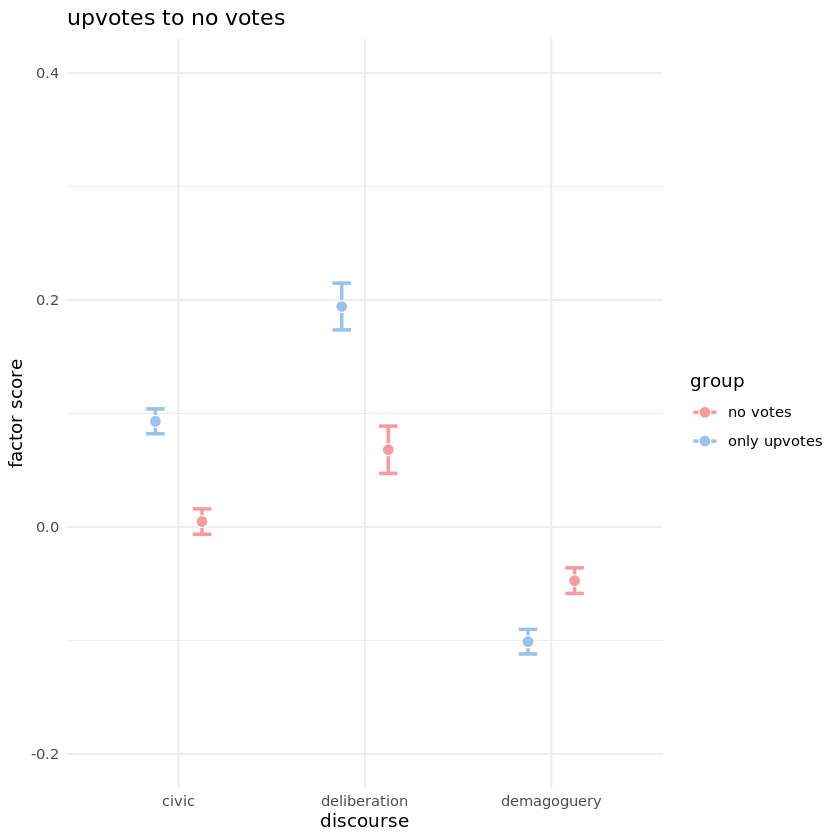

In [9]:
q <- ggplot(data=df_reactions, mapping=aes(x=x, y = predicted, ymin=upper, ymax=lower, col=group,fill= group, group = desc(group)), width=0.02, size=0.1, color="blue") +
  geom_errorbar(size=1,position=position_dodge(width = 0.5), width = 0.2) + 
  scale_fill_manual(values=c( "#f69c9e", "#99C3EC")) +
  scale_color_manual(values=c( "#f69c9e", "#99C3EC")) +
  theme_minimal() +
  geom_point(size=3, shape=21, colour="white", stroke = 0.5,position=position_dodge(width = 0.5)) +
  xlab("discourse") + ylab("factor score") + ggtitle('upvotes to no votes') + #+ theme(text=element_text(size=13)) + theme(aspect.ratio = 0.7) + +
  ylim(-0.2, 0.4)
ggsave(plot = q, width = 5, height = 3, dpi = 300, filename = "upvote_novote.png") 
q